## Data Acquisition 

The point of this project is to build proficiency in Standard Query Language (SQL) and look at the beginning stages of the data analytics lifecycle. 

## Competencies

__Dimension, Quality Relations, and Limitations__ <br>
Examines the data available for analysis to determine their dimension, quality, relations, and limitations. 

__Physical Data Model__<br>
Implements physical data models. 

The focus research question of this project is: What is the most popular internet service for individuals that are married? <br>

To begin, a logical data model was created. The logical data model above is not entirely correct due to the limitations of the ERD function within the pgAdmin tool. The relationship between the services table and the customer table is a one-to-one relationship due to one record being associated with one record within each table. The relationship shown is 1-to-many just due to these limitations and for the sake of a visual reference. The relational constraints between the customer table and the services table are shown using primary and foreign keys. The primary key within the customers table is customer_id which is also the foreign key within the services table. This creates a relationship between the two tables enforcing referential integrity. Referential integrity ensures that a record that is referenced must exist in both tables. 

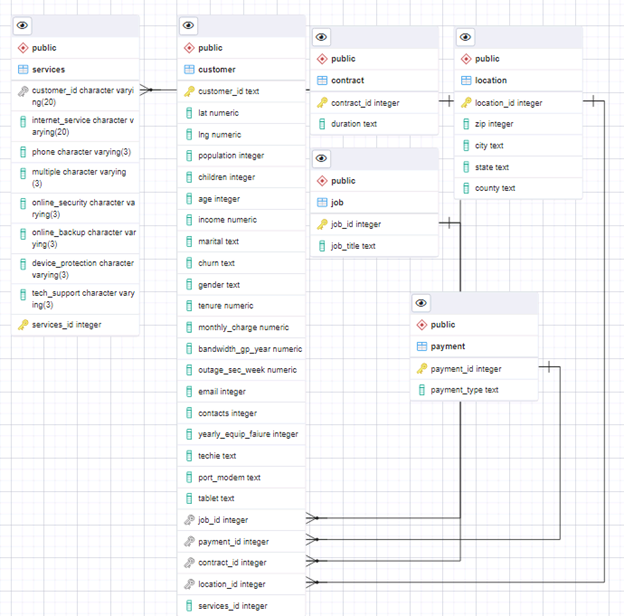

Next - SQL was used to create the corresponding services table. 

In [ ]:
-- Query to create the services table: 
    CREATE TABLE services (
    customer_id varchar(20),
    internet_service varchar(20),
    phone varchar(3),
    multiple varchar(3),
    online_security varchar(3),
    online_backup varchar(3),
    device_protection varchar(3),
    tech_support varchar(3)
);


This query was created to create the services table. We are adding the services table with 8 columns listed within the query. All attributes have a data type of varchar or character varying with character restraints of 20 and 3. 

In [ ]:
-- Query to add the primary key: 
ALTER TABLE services
ADD COLUMN services_id serial PRIMARY KEY;

Within the services table, there was no distinguishable primary key. This led to the decision to create a surrogate key service_id. This primary key was created to auto-increment and add numbers automatically using the serial statement. 

In [ ]:
-- Query to add foreign key: 
ALTER TABLE services
ADD CONSTRAINT services_fkey FOREIGN KEY (customer_id) REFERENCES customer(customer_id);

This query was to add the primary key from the customer table to the services table as a foreign key. This process allows us to establish a relationship between the tables and enforce referential integrity. 

In [ ]:
-- Code to load the data from the add-on CSV file into the table created above: 
COPY public.services (customer_id, internet_service, phone, multiple, online_security, online_backup, device_protection, tech_support) 
FROM 'C:/LabFiles/Services.csv' 
DELIMITER ',' 
CSV HEADER;


To load the CSV data, the copy statement was used to import the CSV file data. The copy statement is followed by the table and the columns along with the from statement being followed by the location or the file path for the services CSV file that was being imported. With the services file being a CSV or comma-separated values file the delimiter is a (,) and the CSV file did contain a header which is evident in the last line of the query. 

In [ ]:
-- Query to find the count of each internet service for married individuals: 
SELECT customer.marital,
services.internet_service,
COUNT(*) AS internet_service_marital
FROM customer
JOIN services
ON customer.customer_id = services.customer_id
WHERE marital = 'Married'
GROUP BY marital, internet_service
ORDER BY internet_service_marital DESC;
	


This query showcases a single join to combine the two tables customer and services. We are selecting the marital status from the customer table and the internet service attribute from the services table. We are then using the aggregate function count with a given alias to count the internet service values. A filter is applied to show only those with a marital status of married and a group by function used in parallel with the aggregate count function. 